In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

from sklearn.manifold import TSNE

In [148]:
data = pd.read_excel('all_excel.xlsx')

In [149]:
df = data.drop(['contender', 'address', 'song'], axis=1)

In [150]:
data

,contender,sexuality,age,address,song,genre,language,Kong,Kim,Joey,Stamp,Singto,Da
0,นนทวิทย์ ศิริพรไพบูลย์ (แบงค์),M,20,กรุงเทพฯ,"""ชีวิตลิขิตเอง"" (ธงไชย แมคอินไตย์)",Pop,th,0,0,1,1,0,0
1,บงกช เจริญธรรม (ฟิล์ม),F,27,จันทบุรี,"""ลืมไปก่อน"" (บุดดาเบลส Feat. แสตมป์)",Acoustic,th,1,1,0,1,0,0
2,ธชย ประทุมวรรณ (เก่ง),M,23,สงขลา,"""What's My Name?"" (ริฮันน่า)",Pop,en,0,0,0,0,0,0
3,ฝนพา สาทิสสะรัต (เมย์),F,31,กรุงเทพฯ,"""La Vie en rose"" (เอดิต ปียัฟ)",Acoustic,en,1,1,1,1,0,0
4,ธนนท์ จำเริญ (นน),M,16,ภูเก็ต,"""ฟ้า"" (แทททูคัลเลอร์)",Pop,th,0,1,1,1,0,0
5,ศุภัสรา แป้นไม้ (หลี่หยุน),F,21,กรุงเทพฯ,"""คิดมาก"" (ปาล์มมี่)",R&B,th,1,1,0,1,0,0
6,เอกพล รัตนกำพล (เอก) &กิรติกานต์ พงศ์ทองสำราญ ...,D,"28,34",กรุงเทพฯ,"""นิยามรัก"" (นูโว)",Acoustic,th,0,1,1,1,0,0
7,หฤษฎ์ ไชยวานิช (ฉัตร),M,24,กรุงเทพฯ,"""นางฟ้า"" (ETC)",Pop,th,1,1,1,1,0,0
8,พิเชษฐ์ บัวขำ (คิง),M,34,ชุมพร,"""I Don't Want to Miss a Thing"" (แอโรสมิธ)",Rock,en,0,0,0,0,0,0
9,จิตสุดา เฮงรัศมี (ปุ้ย),F,42,กรุงเทพฯ,"""Valerie"" (เอมี ไวน์เฮาส์)",Jazz,en,0,0,0,0,0,0


In [119]:
sexuality_dict = {
    'M':0,
    'F':1,
    'D':2
}

genre_dict = {
    'Thai Country':0,
    'Pop':1,
    'Rock':2,
    'Alternative':3,
    'Country':4,
    'Jazz':5,
    'R&B':6,
    'Soul':7,
    'Acoustic':8,
    'Hip-Hop':9,
    'Blues':10
}

language_dict = {
    'th':0,
    'en':1,
    'jp':2,
    'kr':3,
    'cn':4
}

age_dict = {
    '<20':0,
    '21-29':1,
    '30-39':2,
    '>30':3,
}

In [120]:
df['sexuality'] = df['sexuality'].apply(lambda x: sexuality_dict[x])
df['genre'] = df['genre'].apply(lambda x: genre_dict[x])
df['language'] = df['language'].apply(lambda x: language_dict[x])

In [121]:
df

,sexuality,age,genre,language,Kong,Kim,Joey,Stamp,Singto,Da
0,0,20,1,0,0,0,1,1,0,0
1,1,27,8,0,1,1,0,1,0,0
2,0,23,1,1,0,0,0,0,0,0
3,1,31,8,1,1,1,1,1,0,0
4,0,16,1,0,0,1,1,1,0,0
5,1,21,6,0,1,1,0,1,0,0
6,2,"28,34",8,0,0,1,1,1,0,0
7,0,24,1,0,1,1,1,1,0,0
8,0,34,2,1,0,0,0,0,0,0
9,1,42,5,1,0,0,0,0,0,0


In [130]:
data_train = df[['sexuality', 'genre', 'language']]
np_data_train = data_train.values

In [132]:
np_data_train_normed = np_data_train / np_data_train.max(axis=0)

In [144]:
embedded = TSNE(n_components=2).fit_transform(np_data_train_normed)

In [146]:
x_tsne = embedded[:, 0]
y_tsne = embedded[:, 1]

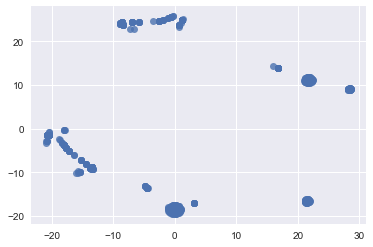

In [147]:
sns.regplot(x=x_tsne, y=y_tsne, fit_reg=False)
plt.show()

In [142]:
embedded

array([[  3.34605455,  29.43830872],
       [  4.22277212,  -1.61006188],
       [ 28.18723106, -10.50727367],
       [  1.31701517,  -2.39690828],
       [  3.30284214,  28.92973328],
       [  3.08210754,  -0.61928272],
       [  3.33286738,  -4.41459036],
       [  3.82477307,  29.24699593],
       [ 27.20695496, -12.22216511],
       [ -0.91612262,  -2.16400766],
       [  4.22277117,  -1.61006212],
       [ -1.4609642 ,  33.71289444],
       [-19.68701553, -19.40747643],
       [-22.41418266,   2.48371935],
       [-23.24810982,   1.09401691],
       [ -5.78182888,  -0.09554308],
       [ 24.94605637, -16.04026413],
       [ -1.74127185,  33.83195114],
       [ 24.51736832, -17.49082565],
       [  8.26052189,  26.03245735],
       [-23.31250954,   3.12598825],
       [ 24.3976059 , -18.0987072 ],
       [  1.31654549,  -2.39645076],
       [ 21.92046547, -17.54407692],
       [  0.6687628 ,  -2.29301286],
       [ 22.65626907, -18.97375107],
       [ -0.10532235,  -2.20261049],
 

In [69]:
from kmodes.kmodes import KModes

In [74]:
km = KModes(n_clusters=6, init='Huang', n_init=100, verbose=1)

clusters = km.fit_predict(data_train)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17, cost: 193.0
Run 2, iteration: 2/100, moves: 0, cost: 193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13, cost: 257.0
Run 3, iteration: 2/100, moves: 0, cost: 257.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 37, cost: 209.0
Run 4, iteration: 2/100, moves: 0, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35, cost: 251.0
Run 5, iteration: 2/100, moves: 0, cost: 251.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2, cost: 258.0
Run 6, iteration: 2/100, moves: 0, cost: 258.0

Starting iterations...
Run 54, iteration: 1/100, moves: 0, cost: 241.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 55, iteration: 1/100, moves: 0, cost: 241.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 56, iteration: 1/100, moves: 2, cost: 236.0
Run 56, iteration: 2/100, moves: 0, cost: 236.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 57, iteration: 1/100, moves: 0, cost: 265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 58, iteration: 1/100, moves: 50, cost: 232.0
Run 58, iteration: 2/100, moves: 0, cost: 232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 59, iteration: 1/100, moves: 0, cost: 223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 60, iteration: 1/100, moves: 37, cost: 212.0
Run 60, iteration: 2/100, moves: 0, cost: 212.0
Init: initializ

In [75]:
clusters.shape

(373,)

In [79]:
cluster_df = pd.DataFrame({'cluster': clusters})

In [81]:
concat_df = pd.concat([df,cluster_df],axis=1)

In [82]:
concat_df

,sexuality,age,genre,language,Kong,Kim,Joey,Stamp,Singto,Da,cluster
0,0,20,1,0,0,0,1,1,0,0,4
1,1,27,8,0,1,1,0,1,0,0,1
2,0,23,1,1,0,0,0,0,0,0,3
3,1,31,8,1,1,1,1,1,0,0,0
4,0,16,1,0,0,1,1,1,0,0,4
5,1,21,6,0,1,1,0,1,0,0,1
6,2,"28,34",8,0,0,1,1,1,0,0,1
7,0,24,1,0,1,1,1,1,0,0,4
8,0,34,2,1,0,0,0,0,0,0,3
9,1,42,5,1,0,0,0,0,0,0,0
